<a href="https://colab.research.google.com/github/ysn2496/Dominos-Purchase-order/blob/main/Dominos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
Sales = pd.read_csv("/content/Pizza_Sale - pizza_sales.csv")

In [ ]:
Sales

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-15,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-15,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-15,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-15,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-15,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-15,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-15,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-15,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-15,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
Sales.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,16
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,7
pizza_size,0
pizza_category,23


In [ ]:
# prompt: create the code for fill nan values in totalprice ,multiple of quantity and unitprice

Sales['total_price'] = Sales['total_price'].fillna(Sales['quantity'] * Sales['unit_price'])


In [ ]:
ingredients_map = Sales[['pizza_name_id','pizza_ingredients']].dropna().drop_duplicates().set_index('pizza_name_id').to_dict()['pizza_ingredients']

In [ ]:
Sales['pizza_ingredients'] = Sales['pizza_ingredients'].fillna(Sales['pizza_name_id'].map(ingredients_map))

In [ ]:
id_map = Sales[['pizza_ingredients','pizza_name_id']].dropna().drop_duplicates().set_index('pizza_ingredients').to_dict()['pizza_name_id']

In [ ]:
Sales['pizza_name_id'] = Sales['pizza_name_id'].fillna(Sales['pizza_ingredients'].map(id_map))

In [ ]:
Category_map = Sales[['pizza_name_id','pizza_category']].dropna().drop_duplicates().set_index('pizza_name_id').to_dict()['pizza_category']

In [ ]:
Sales['pizza_category'] = Sales['pizza_category'].fillna(Sales['pizza_name_id'].map(Category_map))

In [ ]:
name_map = Sales[['pizza_name_id','pizza_name']].dropna().drop_duplicates().set_index('pizza_name_id').to_dict()['pizza_name']

In [ ]:
Sales['pizza_name'] = Sales['pizza_name'].fillna(Sales['pizza_name_id'].map(name_map))

In [ ]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [ ]:
Sales['order_date'] = pd.to_datetime(Sales['order_date'])

<ipython-input-84-b85d18c99ee4>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Sales['order_date'] = pd.to_datetime(Sales['order_date'])


In [ ]:
Sales['order_time'] = pd.to_datetime(Sales['order_time'],format='%H:%M:%S')

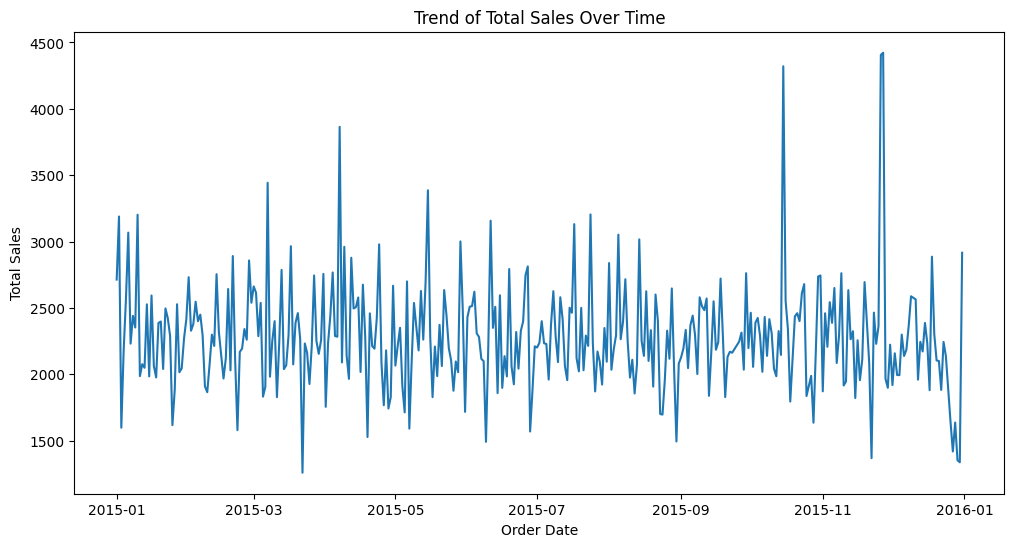

In [ ]:
# prompt: write the code for analyze trends,seasionality,pattern in data

import matplotlib.pyplot as plt

# Analyze Trends in Total Sales Over Time
sales_by_date = Sales.groupby('order_date')['total_price'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.title('Trend of Total Sales Over Time')
plt.show()







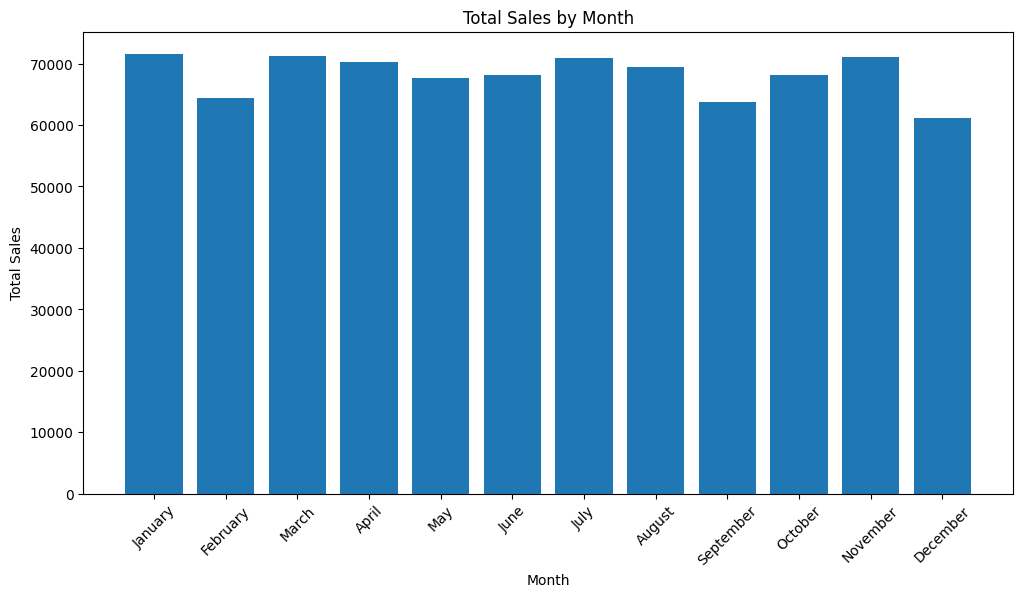

In [ ]:
# prompt: write the code for i want month name in bar graph order wise from january to december

# Extract the month from the order_date
Sales['month'] = Sales['order_date'].dt.month_name()

# Group by month and calculate total sales for each month
monthly_sales = Sales.groupby('month')['total_price'].sum()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the monthly_sales series to ensure the months are in the correct order
monthly_sales = monthly_sales.reindex(month_order)

# Create a bar plot of monthly sales
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

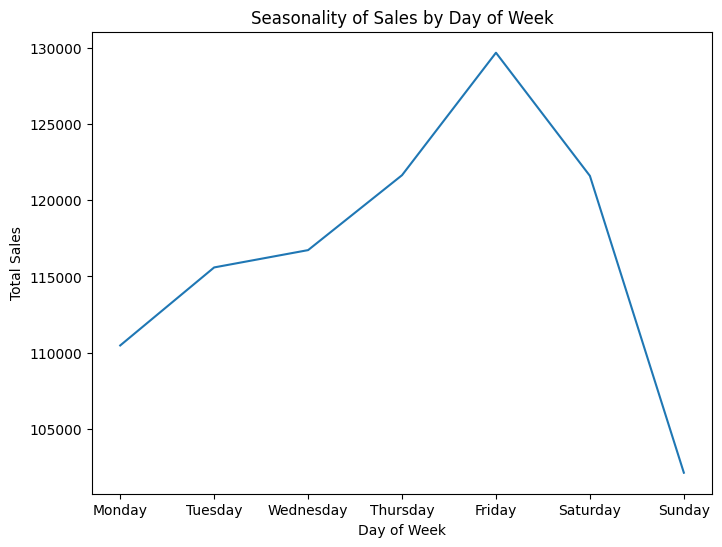

In [ ]:
# prompt: write the code for in plot i want name of days

# Analyze Seasonality (e.g., Sales by Month or Day of Week)

Sales['order_day_of_week'] = Sales['order_date'].dt.dayofweek  # 0: Monday, 6: Sunday

sales_by_day_of_week = Sales.groupby('order_day_of_week')['total_price'].sum()

# Map day of week numbers to names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(8, 6))
plt.plot(day_names, sales_by_day_of_week.values)  # Use day_names for x-axis
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.title('Seasonality of Sales by Day of Week')
plt.show()

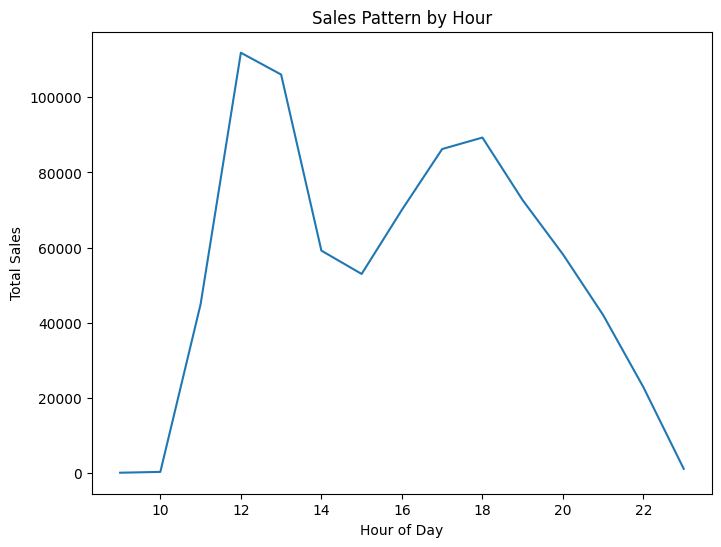

In [ ]:
# Analyze Patterns (e.g., Sales by Hour or Pizza Category)
sales_by_hour = Sales.groupby(Sales['order_time'].dt.hour)['total_price'].sum()
plt.figure(figsize=(8, 6))
plt.plot(sales_by_hour.index, sales_by_hour.values)
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.title('Sales Pattern by Hour')
plt.show()

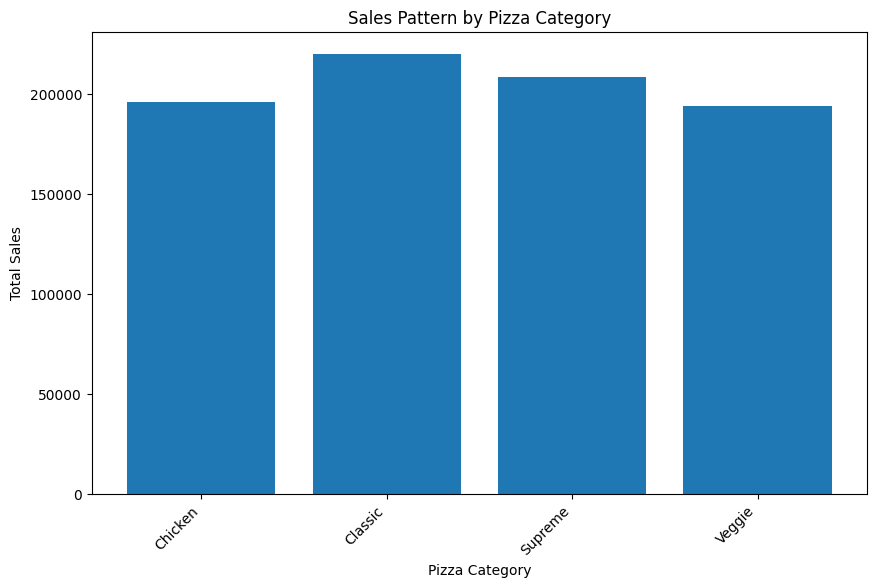

In [ ]:


sales_by_category = Sales.groupby('pizza_category')['total_price'].sum()
plt.figure(figsize=(10, 6))
plt.bar(sales_by_category.index, sales_by_category.values)
plt.xlabel('Pizza Category')
plt.ylabel('Total Sales')
plt.title('Sales Pattern by Pizza Category')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
Sales

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,month,order_day_of_week
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,January,3
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,January,3
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,January,3
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,January,3
4,5,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,January,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,1900-01-01 21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,December,3
48616,48617,21348,four_cheese_l,1,2015-12-31,1900-01-01 21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,December,3
48617,48618,21348,napolitana_s,1,2015-12-31,1900-01-01 21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,December,3
48618,48619,21349,mexicana_l,1,2015-12-31,1900-01-01 22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,December,3


In [ ]:
# prompt: write the code for drop columns name order_month

# Assuming 'order_month' is a column in your DataFrame 'Sales'
if 'order_month' in Sales.columns:
  Sales = Sales.drop('order_month', axis=1)
  print("Column 'order_month' dropped successfully.")
else:
  print("Column 'order_month' not found in the DataFrame.")


Column 'order_month' dropped successfully.


In [ ]:
Sales.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'month',
       'order_day_of_week'],
      dtype='object')

In [ ]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48608 entries, 0 to 48619
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48608 non-null  int64         
 1   order_id           48608 non-null  int64         
 2   pizza_name_id      48608 non-null  object        
 3   quantity           48608 non-null  int64         
 4   order_date         48608 non-null  datetime64[ns]
 5   order_time         48608 non-null  datetime64[ns]
 6   unit_price         48608 non-null  float64       
 7   total_price        48608 non-null  float64       
 8   pizza_size         48608 non-null  object        
 9   pizza_category     48608 non-null  object        
 10  pizza_ingredients  48608 non-null  object        
 11  pizza_name         48608 non-null  object        
 12  order_day_of_week  48608 non-null  int32         
 13  month              48608 non-null  object        
dtypes: datetime

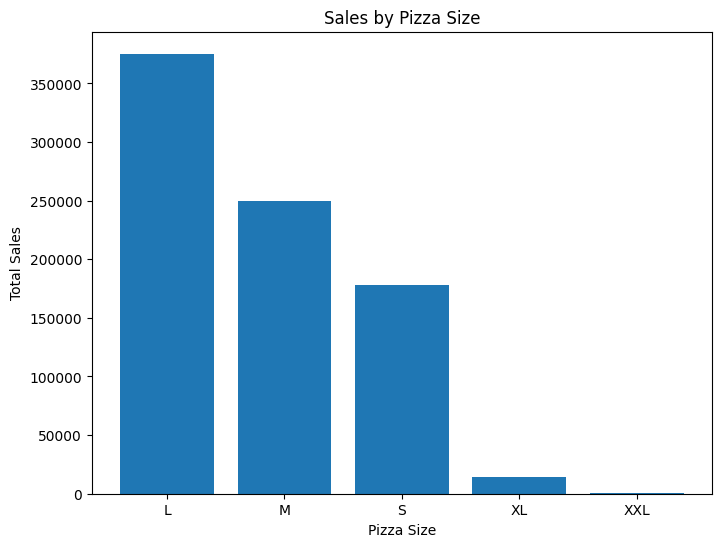

In [ ]:
# Analyze Sales by Pizza Size
sales_by_size = Sales.groupby('pizza_size')['total_price'].sum()
plt.figure(figsize=(8, 6))
plt.bar(sales_by_size.index, sales_by_size.values)
plt.xlabel('Pizza Size')
plt.ylabel('Total Sales')
plt.title('Sales by Pizza Size')
plt.show()

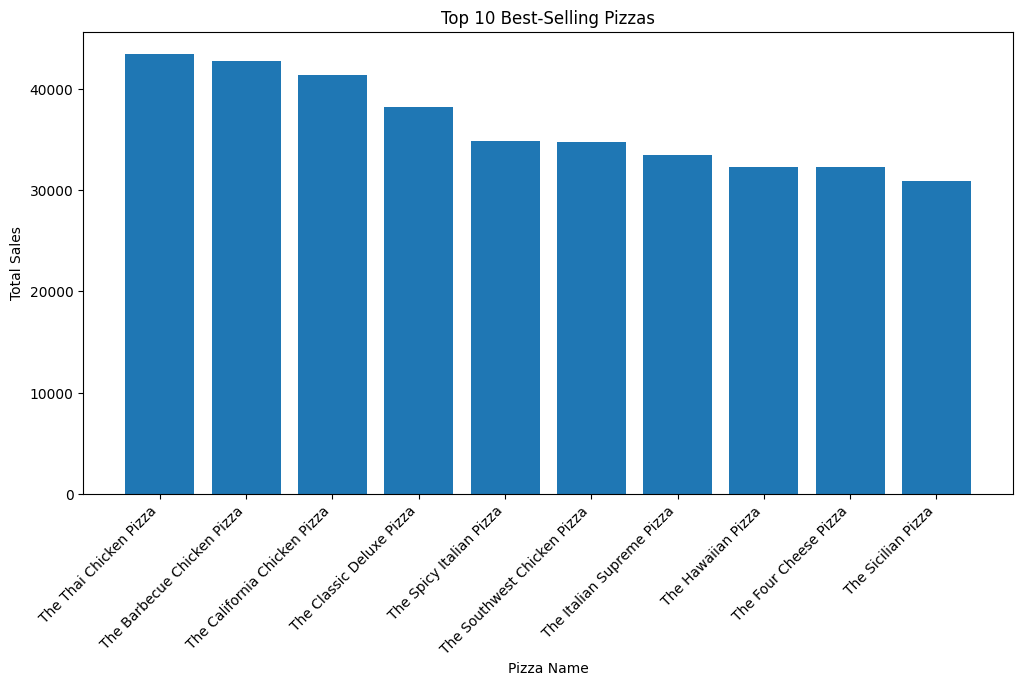

In [ ]:
# Analyze Sales by Pizza Name
sales_by_pizza_name = Sales.groupby('pizza_name')['total_price'].sum()
top_10_pizza_names = sales_by_pizza_name.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_pizza_names.index, top_10_pizza_names.values)
plt.xlabel('Pizza Name')
plt.ylabel('Total Sales')
plt.title('Top 10 Best-Selling Pizzas')
plt.xticks(rotation=45, ha='right')
plt.show()


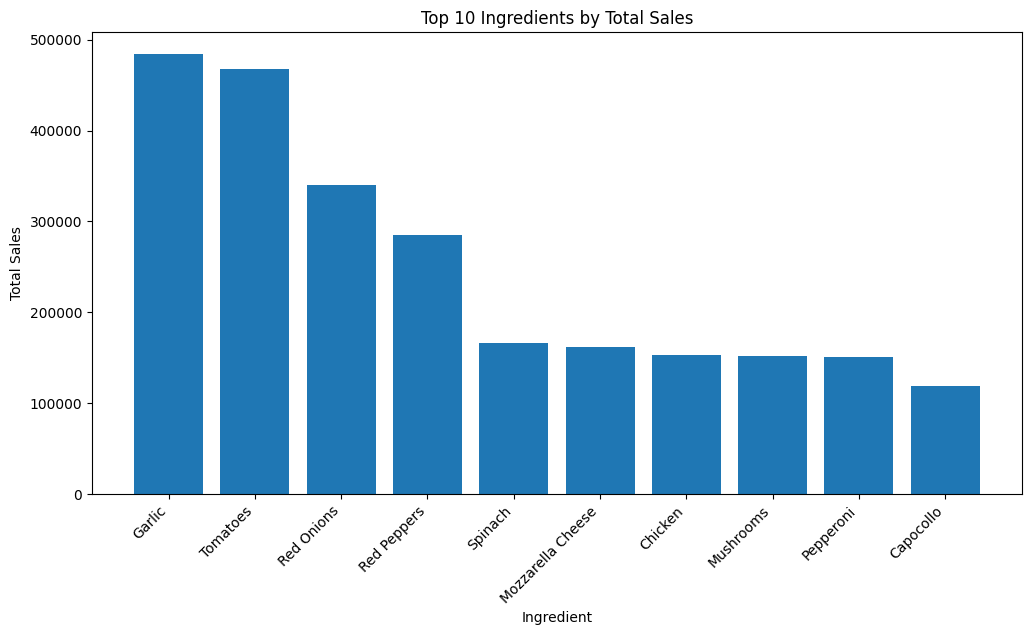

In [ ]:
# Analyze Sales by Ingredient
Sales['pizza_ingredients'] = Sales['pizza_ingredients'].astype(str)
Sales['pizza_ingredients'] = Sales['pizza_ingredients'].str.replace('[', '').str.replace(']', '').str.replace("'", "")
Sales['pizza_ingredients'] = Sales['pizza_ingredients'].str.split(',')

from collections import defaultdict

ingredient_sales = defaultdict(float)
for index, row in Sales.iterrows():
  if isinstance(row['pizza_ingredients'], list):
    for ingredient in row['pizza_ingredients']:
      ingredient_sales[ingredient.strip()] += row['total_price']


sorted_ingredients = sorted(ingredient_sales.items(), key=lambda item: item[1], reverse=True)
top_10_ingredients = sorted_ingredients[:10]

ingredient_names = [ingredient[0] for ingredient in top_10_ingredients]
ingredient_totals = [ingredient[1] for ingredient in top_10_ingredients]

plt.figure(figsize=(12, 6))
plt.bar(ingredient_names, ingredient_totals)
plt.xlabel('Ingredient')
plt.ylabel('Total Sales')
plt.title('Top 10 Ingredients by Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# prompt: write the code for feature engineering in sales data

# Create new features
Sales['order_hour'] = Sales['order_time'].dt.hour
Sales['order_day'] = Sales['order_date'].dt.day
Sales['order_year'] = Sales['order_date'].dt.year



In [ ]:
Sales

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,month,order_day_of_week,order_hour,order_day,order_year
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,13.25,13.25,M,Classic,"[Sliced Ham, Pineapple, Mozzarella Cheese]",The Hawaiian Pizza,January,3,11,1,2015
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Classic,"[Pepperoni, Mushrooms, Red Onions, Red Pepp...",The Classic Deluxe Pizza,January,3,11,1,2015
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,18.50,18.50,L,Veggie,"[Mozzarella Cheese, Provolone Cheese, Smoked...",The Five Cheese Pizza,January,3,11,1,2015
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,20.75,20.75,L,Supreme,"[Calabrese Salami, Capocollo, Tomatoes, Red...",The Italian Supreme Pizza,January,3,11,1,2015
4,5,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Veggie,"[Tomatoes, Red Peppers, Jalapeno Peppers, R...",The Mexicana Pizza,January,3,11,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,1900-01-01 21:23:10,16.75,16.75,M,Chicken,"[Chicken, Red Onions, Red Peppers, Mushroom...",The Chicken Alfredo Pizza,December,3,21,31,2015
48616,48617,21348,four_cheese_l,1,2015-12-31,1900-01-01 21:23:10,17.95,17.95,L,Veggie,"[Ricotta Cheese, Gorgonzola Piccante Cheese, ...",The Four Cheese Pizza,December,3,21,31,2015
48617,48618,21348,napolitana_s,1,2015-12-31,1900-01-01 21:23:10,12.00,12.00,S,Classic,"[Tomatoes, Anchovies, Green Olives, Red Oni...",The Napolitana Pizza,December,3,21,31,2015
48618,48619,21349,mexicana_l,1,2015-12-31,1900-01-01 22:09:54,20.25,20.25,L,Veggie,"[Tomatoes, Red Peppers, Jalapeno Peppers, R...",The Mexicana Pizza,December,3,22,31,2015


In [ ]:
# prompt: write the code for drop columns'\

# Assuming you want to drop the 'order_month' column if it exists
if 'month' in Sales.columns:
  Sales = Sales.drop('month', axis=1)
  print("Column 'month' dropped successfully.")
else:
  print("Column 'month' not found in the DataFrame.")

Column 'month' dropped successfully.


In [ ]:
Sales.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name',
       'order_day_of_week', 'order_hour', 'order_day', 'order_year'],
      dtype='object')

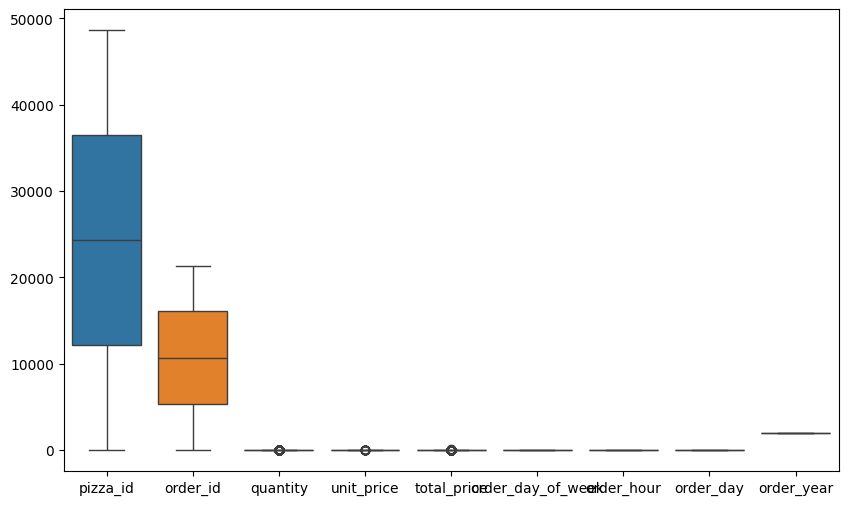

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data = Sales)
plt.show()

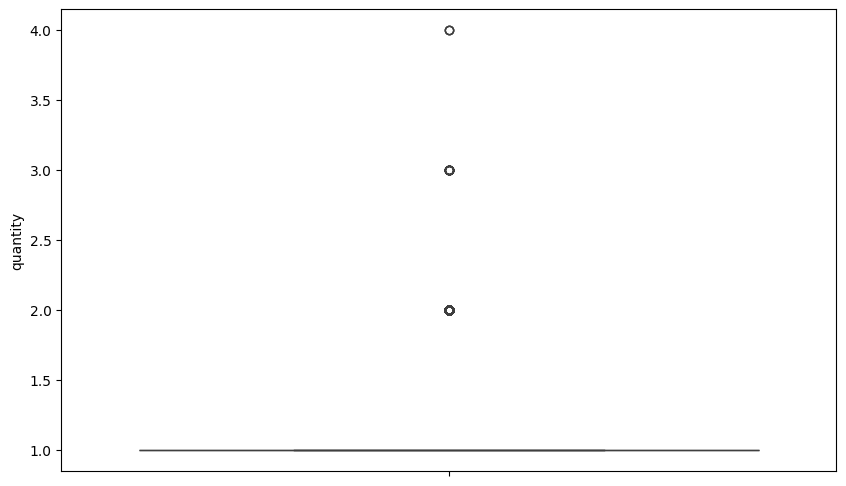

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data = Sales['quantity'])
plt.show()

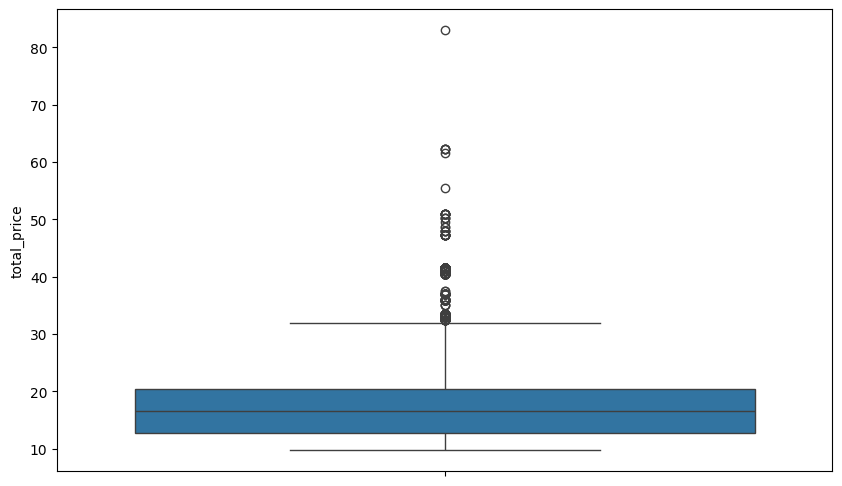

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data = Sales['total_price'])
plt.show()

In [ ]:
# prompt: write the code for holiday effects in the dataset

import holidays

# Assuming 'order_date' is a column in your Sales DataFrame
# Define the country for holidays (e.g., 'US' for United States)
us_holidays = holidays.US()

# Create a new column 'is_holiday' indicating whether the order date is a holiday
Sales['is_holiday'] = Sales['order_date'].apply(lambda date: date in us_holidays)

# Now you can analyze sales on holidays vs. non-holidays
holiday_sales = Sales[Sales['is_holiday']]['total_price'].sum()
non_holiday_sales = Sales[~Sales['is_holiday']]['total_price'].sum()

print(f"Total sales on holidays: {holiday_sales}")
print(f"Total sales on non-holidays: {non_holiday_sales}")

# You can further analyze sales trends during holidays or compare sales on different holidays.

Total sales on holidays: 24444.399999999998
Total sales on non-holidays: 793415.65


In [ ]:
Sales

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_day_of_week,order_hour,order_day,order_year,is_holiday
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,13.25,13.25,M,Classic,"[Sliced Ham, Pineapple, Mozzarella Cheese]",The Hawaiian Pizza,3,11,1,2015,True
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Classic,"[Pepperoni, Mushrooms, Red Onions, Red Pepp...",The Classic Deluxe Pizza,3,11,1,2015,True
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,18.50,18.50,L,Veggie,"[Mozzarella Cheese, Provolone Cheese, Smoked...",The Five Cheese Pizza,3,11,1,2015,True
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,20.75,20.75,L,Supreme,"[Calabrese Salami, Capocollo, Tomatoes, Red...",The Italian Supreme Pizza,3,11,1,2015,True
4,5,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Veggie,"[Tomatoes, Red Peppers, Jalapeno Peppers, R...",The Mexicana Pizza,3,11,1,2015,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,1900-01-01 21:23:10,16.75,16.75,M,Chicken,"[Chicken, Red Onions, Red Peppers, Mushroom...",The Chicken Alfredo Pizza,3,21,31,2015,False
48616,48617,21348,four_cheese_l,1,2015-12-31,1900-01-01 21:23:10,17.95,17.95,L,Veggie,"[Ricotta Cheese, Gorgonzola Piccante Cheese, ...",The Four Cheese Pizza,3,21,31,2015,False
48617,48618,21348,napolitana_s,1,2015-12-31,1900-01-01 21:23:10,12.00,12.00,S,Classic,"[Tomatoes, Anchovies, Green Olives, Red Oni...",The Napolitana Pizza,3,21,31,2015,False
48618,48619,21349,mexicana_l,1,2015-12-31,1900-01-01 22:09:54,20.25,20.25,L,Veggie,"[Tomatoes, Red Peppers, Jalapeno Peppers, R...",The Mexicana Pizza,3,22,31,2015,False


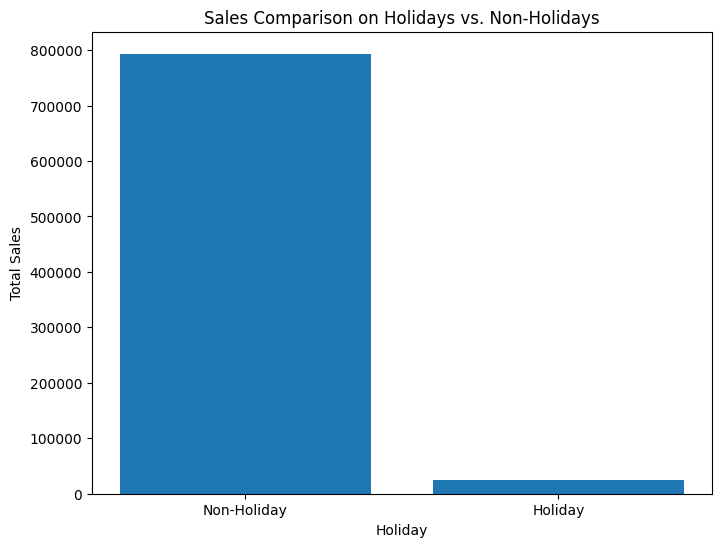

In [ ]:
# prompt: analyze sales trends during holidays or compare sales on different holidays.



# Group by holiday and calculate total sales
holiday_sales = Sales.groupby('is_holiday')['total_price'].sum()

# Create a bar plot to compare sales on holidays vs. non-holidays
plt.figure(figsize=(8, 6))
plt.bar(holiday_sales.index, holiday_sales.values)
plt.xlabel('Holiday')
plt.ylabel('Total Sales')
plt.title('Sales Comparison on Holidays vs. Non-Holidays')
plt.xticks([False, True], ['Non-Holiday', 'Holiday'])  # Customize x-axis labels
plt.show()




In [ ]:
Ingredients = pd.read_csv("/content/Pizza_ingredients - Pizza_ingredients.csv")

In [ ]:
Ingredients

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0


In [ ]:
Ingredients.isnull().sum()

,0
pizza_name_id,0
pizza_name,0
pizza_ingredients,0
Items_Qty_In_Grams,0


In [ ]:
Ingredients.dropna(inplace=True)

In [ ]:
# prompt: write the code for store the data in csv file

# Assuming 'Sales' DataFrame is already defined and processed as in your code

# Save the cleaned and processed DataFrame to a CSV file
Sales.to_csv('sales.csv', index=False)

# Optionally, you can also save the Ingredients DataFrame if needed
Ingredients.to_csv('ingredients.csv', index=False)

print("Data saved to CSV files successfully.")

Data saved to CSV files successfully.


In [2]:
import pandas as pd
sales_data = pd.read_csv('/content/sales.csv')

In [3]:
sales_data

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_day_of_week,order_hour,order_day,order_year,is_holiday
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,13.25,13.25,M,Classic,"['Sliced Ham', ' Pineapple', ' Mozzarella Chee...",The Hawaiian Pizza,3,11,1,2015,True
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Classic,"['Pepperoni', ' Mushrooms', ' Red Onions', ' R...",The Classic Deluxe Pizza,3,11,1,2015,True
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,18.50,18.50,L,Veggie,"['Mozzarella Cheese', ' Provolone Cheese', ' S...",The Five Cheese Pizza,3,11,1,2015,True
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,20.75,20.75,L,Supreme,"['Calabrese Salami', ' Capocollo', ' Tomatoes'...",The Italian Supreme Pizza,3,11,1,2015,True
4,5,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Veggie,"['Tomatoes', ' Red Peppers', ' Jalapeno Pepper...",The Mexicana Pizza,3,11,1,2015,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,1900-01-01 21:23:10,16.75,16.75,M,Chicken,"['Chicken', ' Red Onions', ' Red Peppers', ' M...",The Chicken Alfredo Pizza,3,21,31,2015,False
48616,48617,21348,four_cheese_l,1,2015-12-31,1900-01-01 21:23:10,17.95,17.95,L,Veggie,"['Ricotta Cheese', ' Gorgonzola Piccante Chees...",The Four Cheese Pizza,3,21,31,2015,False
48617,48618,21348,napolitana_s,1,2015-12-31,1900-01-01 21:23:10,12.00,12.00,S,Classic,"['Tomatoes', ' Anchovies', ' Green Olives', ' ...",The Napolitana Pizza,3,21,31,2015,False
48618,48619,21349,mexicana_l,1,2015-12-31,1900-01-01 22:09:54,20.25,20.25,L,Veggie,"['Tomatoes', ' Red Peppers', ' Jalapeno Pepper...",The Mexicana Pizza,3,22,31,2015,False


In [4]:
# prompt: write the code for one hot encoding for pizza_name column in sales_data dataset

# Perform one-hot encoding on the 'pizza_name' column
pizza_name_encoded = pd.get_dummies(sales_data['pizza_name'], prefix='pizza_name')

# Concatenate the encoded columns with the original DataFrame
sales_data = pd.concat([sales_data, pizza_name_encoded], axis=1)

# You can now drop the original 'pizza_name' column if you no longer need it
# sales_data = sales_data.drop('pizza_name', axis=1)

# Display the updated DataFrame with one-hot encoded columns
sales_data.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,...,pizza_name_The Prosciutto and Arugula Pizza,pizza_name_The Sicilian Pizza,pizza_name_The Soppressata Pizza,pizza_name_The Southwest Chicken Pizza,pizza_name_The Spicy Italian Pizza,pizza_name_The Spinach Pesto Pizza,pizza_name_The Spinach Supreme Pizza,pizza_name_The Spinach and Feta Pizza,pizza_name_The Thai Chicken Pizza,pizza_name_The Vegetables + Vegetables Pizza
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,13.25,13.25,M,Classic,...,False,False,False,False,False,False,False,False,False,False
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Classic,...,False,False,False,False,False,False,False,False,False,False
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,18.50,18.50,L,Veggie,...,False,False,False,False,False,False,False,False,False,False
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,20.75,20.75,L,Supreme,...,False,False,False,False,False,False,False,False,False,False
4,5,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Veggie,...,False,False,False,False,False,False,False,False,False,False


In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   pizza_id                                               48620 non-null  int64  
 1   order_id                                               48620 non-null  int64  
 2   pizza_name_id                                          48620 non-null  object 
 3   quantity                                               48620 non-null  int64  
 4   order_date                                             48620 non-null  object 
 5   order_time                                             48620 non-null  object 
 6   unit_price                                             48620 non-null  float64
 7   total_price                                            48620 non-null  float64
 8   pizza_size                                    

In [6]:
ingredients_data = pd.read_csv('/content/ingredients.csv')

In [7]:
ingredients_data

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
...,...,...,...,...
509,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0
510,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0
511,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0
512,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0


In [8]:
ingredients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       514 non-null    object 
 1   pizza_name          514 non-null    object 
 2   pizza_ingredients   514 non-null    object 
 3   Items_Qty_In_Grams  514 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.2+ KB


In [9]:
#ARIMA model
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error


daily_sales = sales_data.groupby('order_date')['quantity'].sum().reset_index()

# Set the order for the ARIMA model (p, d, q)
arima_order = (5, 1, 2)

# Split data into train and test sets
train_size = len(daily_sales) - 7
train_data, test_data = daily_sales[:train_size], daily_sales[train_size:]

# Fit the ARIMA model
arima_model = ARIMA(train_data['quantity'], order=arima_order)
arima_result = arima_model.fit()

# Forecast the next 7 days
forecast = arima_result.forecast(steps=7)

# Calculate MAPE for model performance
mape = mean_absolute_percentage_error(test_data['quantity'], forecast)
print(f"MAPE: {mape}")



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE: 0.4553962182443044


In [10]:
#SARIMA model
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error

daily_sales = sales_data.groupby('order_date')['quantity'].sum().reset_index()

# Set SARIMA model order (p, d, q) and seasonal_order (P, D, Q, m)
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 7)  # Weekly seasonality

# Split data into train and test sets
train_size = len(daily_sales) - 7
train_data, test_data = daily_sales[:train_size], daily_sales[train_size:]

# Fit the SARIMA model
sarima_model = SARIMAX(train_data['quantity'], order=sarima_order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

# Forecast the next 7 days
forecast = sarima_result.forecast(steps=7)

# Calculate MAPE
mape = mean_absolute_percentage_error(test_data['quantity'], forecast)
print(f"MAPE (SARIMA): {mape}")



MAPE (SARIMA): 0.4681768331741158


In [ ]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 95.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

In [11]:
from prophet import Prophet
import pandas as pd


daily_sales = sales_data.groupby('order_date')['quantity'].sum().reset_index()
daily_sales.columns = ['ds', 'y']  # Prophet expects 'ds' for date and 'y' for the target variable

# Initialize the Prophet model
prophet_model = Prophet()

# Fit the model on the daily sales data
prophet_model.fit(daily_sales)

# Forecast for the next 7 days
future = prophet_model.make_future_dataframe(periods=7)
forecast = prophet_model.predict(future)

# Extract the forecasted sales
forecasted_sales = forecast[['ds', 'yhat']].tail(7)

# Optionally calculate MAPE if you have test data
test_data = daily_sales[-7:]
mape = mean_absolute_percentage_error(test_data['y'], forecasted_sales['yhat'])
print(f"MAPE (Prophet): {mape}")



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3s43c09g/c1gvrmi8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3s43c09g/qh0wev2i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63793', 'data', 'file=/tmp/tmp3s43c09g/c1gvrmi8.json', 'init=/tmp/tmp3s43c09g/qh0wev2i.json', 'output', 'file=/tmp/tmp3s43c09g/prophet_modelg6p8247t/prophet_model-20241022060919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:09:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:09:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAPE (Prophet): 0.39629774849861105


In [12]:
# Calculate pizza sales distribution
pizza_sales_proportion = sales_data.groupby('pizza_name')['quantity'].sum() / sales_data['quantity'].sum()


In [13]:
pizza_sales_proportion

,quantity
pizza_name,
The Barbecue Chicken Pizza,0.049058
The Big Meat Pizza,0.038609
The Brie Carre Pizza,0.009884
The Calabrese Pizza,0.018901
The California Chicken Pizza,0.047807
The Chicken Alfredo Pizza,0.019910
The Chicken Pesto Pizza,0.019627
The Classic Deluxe Pizza,0.049482
The Five Cheese Pizza,0.028422


In [14]:
# Predict sales of each pizza type for the next 7 days
predicted_pizza_sales = (forecasted_sales['yhat'].values[:, None] * pizza_sales_proportion.values).T
predicted_pizza_sales_df = pd.DataFrame(predicted_pizza_sales, index=pizza_sales_proportion.index, columns=[f'Day {i+1}' for i in range(7)])

In [15]:
predicted_pizza_sales_df

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
pizza_name,,,,,,,
The Barbecue Chicken Pizza,7.606727,6.887189,5.860259,6.454119,6.484516,6.556971,6.999551
The Big Meat Pizza,5.986544,5.420263,4.612062,5.079434,5.103357,5.160379,5.508692
The Brie Carre Pizza,1.532605,1.387633,1.180727,1.300378,1.306502,1.321100,1.410271
The Calabrese Pizza,2.930717,2.653493,2.257838,2.486640,2.498352,2.526267,2.696784
The California Chicken Pizza,7.412806,6.711611,5.710861,6.289582,6.319203,6.389812,6.821108
The Chicken Alfredo Pizza,3.087105,2.795089,2.378321,2.619332,2.631668,2.661073,2.840689
The Chicken Pesto Pizza,3.043316,2.755442,2.344586,2.582178,2.594340,2.623328,2.800396
The Classic Deluxe Pizza,7.672410,6.946659,5.910862,6.509850,6.540509,6.613590,7.059991
The Five Cheese Pizza,4.407022,3.990152,3.395191,3.739249,3.756860,3.798837,4.055250


In [16]:
# Merge pizza sales prediction with ingredient data
ingredients_data_grouped = ingredients_data.groupby('pizza_name_id').sum()
pizza_name_to_id = sales_data[['pizza_name', 'pizza_name_id']].drop_duplicates()
ingredient_requirements = pizza_name_to_id.merge(ingredients_data_grouped, left_on='pizza_name_id', right_index=True)

In [19]:
ingredient_requirements

,pizza_name_x,pizza_name_id,pizza_name_y,pizza_ingredients,Items_Qty_In_Grams
0,The Hawaiian Pizza,hawaiian_m,The Hawaiian PizzaThe Hawaiian Pizza,PineappleMozzarella Cheese,50.0
1,The Classic Deluxe Pizza,classic_dlx_m,The Classic Deluxe PizzaThe Classic Deluxe Piz...,PepperoniMushroomsRed OnionsRed PeppersBacon,230.0
2,The Five Cheese Pizza,five_cheese_l,The Five Cheese PizzaThe Five Cheese PizzaThe ...,Mozzarella CheeseProvolone CheeseSmoked Gouda ...,165.0
3,The Italian Supreme Pizza,ital_supr_l,The Italian Supreme PizzaThe Italian Supreme P...,Calabrese SalamiCapocolloTomatoesRed OnionsGre...,420.0
4,The Mexicana Pizza,mexicana_m,The Mexicana PizzaThe Mexicana PizzaThe Mexica...,TomatoesRed PeppersJalapeno PeppersRed OnionsC...,190.0
...,...,...,...,...,...
456,The Chicken Alfredo Pizza,ckn_alfredo_l,The Chicken Alfredo PizzaThe Chicken Alfredo P...,ChickenRed OnionsRed PeppersMushroomsAsiago Ch...,335.0
573,The Calabrese Pizza,calabrese_s,The Calabrese PizzaThe Calabrese PizzaThe Cala...,?duja SalamiPancettaTomatoesRed OnionsFriggite...,90.0
591,The Greek Pizza,the_greek_l,The Greek PizzaThe Greek PizzaThe Greek PizzaT...,Kalamata OlivesFeta CheeseTomatoesGarlicBeef C...,260.0
617,The Soppressata Pizza,soppressata_m,The Soppressata PizzaThe Soppressata PizzaThe ...,Soppressata SalamiFontina CheeseMozzarella Che...,190.0


In [23]:


ingredient_requirements = ingredient_requirements.drop_duplicates(subset=['pizza_name_x'])  # Remove rows with duplicate pizza names


# Convert 'Items_Qty_In_Grams' to numeric, handling errors
ingredient_requirements['Items_Qty_In_Grams'] = pd.to_numeric(ingredient_requirements['Items_Qty_In_Grams'], errors='coerce')

# Calculate required ingredients based on predicted sales, only for numeric columns
numeric_columns = ingredient_requirements.select_dtypes(include=['number']).columns
ingredient_requirements_df = ingredient_requirements.set_index('pizza_name_x')[numeric_columns].mul(predicted_pizza_sales_df.sum(axis=1), axis=0)

# Re-add the 'pizza_ingredients' column (which was excluded from the multiplication)
ingredient_requirements_df = ingredient_requirements_df.join(ingredient_requirements.set_index('pizza_name_x')['pizza_ingredients'])

print(ingredient_requirements_df[['pizza_ingredients', 'Items_Qty_In_Grams']])

                                                                            pizza_ingredients  \
The Barbecue Chicken Pizza                  Barbecued ChickenRed PeppersGreen PeppersTomat...   
The Big Meat Pizza                               BaconPepperoniItalian SausageChorizo Sausage   
The Brie Carre Pizza                              Brie Carre CheeseProsciuttoPearsThymeGarlic   
The Calabrese Pizza                         ?duja SalamiPancettaTomatoesRed OnionsFriggite...   
The California Chicken Pizza                ChickenArtichokesSpinachGarlicJalapeno Peppers...   
The Chicken Alfredo Pizza                   ChickenRed OnionsRed PeppersMushroomsAsiago Ch...   
The Chicken Pesto Pizza                     ChickenTomatoesRed PeppersSpinachGarlicPesto S...   
The Classic Deluxe Pizza                         PepperoniMushroomsRed OnionsRed PeppersBacon   
The Five Cheese Pizza                       Mozzarella CheeseProvolone CheeseSmoked Gouda ...   
The Four Cheese Pizza         

In [24]:
# Aggregate the required quantities for each ingredient
purchase_order = ingredient_requirements_df.groupby('pizza_ingredients').sum()
print("Purchase Order for Ingredients:")
print(purchase_order[['Items_Qty_In_Grams']])


Purchase Order for Ingredients:
                                                    Items_Qty_In_Grams
pizza_ingredients                                                     
?duja SalamiPancettaTomatoesRed OnionsFriggitel...         3249.016569
BaconPepperoniItalian SausageChorizo Sausage               9586.390404
Barbecued ChickenRed PeppersGreen PeppersTomato...         3747.946542
Brie Carre CheeseProsciuttoPearsThymeGarlic                 755.137255
Calabrese SalamiCapocolloTomatoesRed OnionsGree...        15242.984886
CapocolloRed PeppersTomatoesGoat CheeseGarlicOr...         7894.844424
CapocolloTomatoesGoat CheeseArtichokesPeperonci...        10748.377119
ChickenArtichokesSpinachGarlicJalapeno PeppersF...        13924.769519
ChickenPineappleTomatoesRed PeppersThai Sweet C...        12332.046348
ChickenRed OnionsRed PeppersMushroomsAsiago Che...         2186.526892
ChickenTomatoesRed PeppersRed OnionsJalapeno Pe...        15325.337227
ChickenTomatoesRed PeppersSpinachGarlicPesto 